# Importation des données

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [25]:
# data_beat_aml = pd.read_csv("BEATAMLdata/BEATAML_CliniquesShort.csv", comment="#")
data_beat_aml = pd.read_csv("BEATAMLdata/BEATAML_Cliniques.csv", comment="#")
data_NPM1_mut = pd.read_csv("MUTdata/NPM1_alt.tsv", sep="\t")
index_file = "BEATAMLdata/BEATAML_index.tsv"

# Liste des individus indexés sur Transipédia (pouvant être repérés par l'outil de Sandra)

In [26]:
with open(index_file) as f:
    index = f.readlines()[0]

index_list = index.split("\t")
index_list = [ind[:6] for ind in index_list]

print(index_list)

['BA2040', 'BA2160', 'BA2303', 'BA2353', 'BA2516', 'BA2590', 'BA2647', 'BA2891', 'BA2924', 'BA2971', 'BA3036', 'BA3059', 'BA3073', 'BA3078', 'BA3079', 'BA3083', 'BA3084', 'BA3085', 'BA3087', 'BA3089', 'BA3094', 'BA3095', 'BA3098', 'BA3099', 'BA3103', 'BA3108', 'BA3109', 'BA3110', 'BA3114', 'BA3116', 'BA3117', 'BA3118', 'BA3119', 'BA3123', 'BA3124', 'BA3126', 'BA3128', 'BA3130', 'BA3133', 'BA3135', 'BA3136', 'BA3137', 'BA3138', 'BA3139', 'BA3141', 'BA3142', 'BA3145', 'BA3146', 'BA3149', 'BA3152', 'BA3153', 'BA3154', 'BA3156', 'BA3157', 'BA3158', 'BA3162', 'BA3163', 'BA3164', 'BA3167', 'BA3169', 'BA3171', 'BA3173', 'BA3174', 'BA3175', 'BA3176', 'BA3177', 'BA3178', 'BA3180', 'BA3181', 'BA3182', 'BA3183', 'BA3185', 'BA3186', 'BA3187', 'BA3189', 'BA3190', 'BA3191', 'BA3192', 'BA3194', 'BA3195', 'BA3197', 'BA3199', 'BA3200', 'BA3202', 'BA3203', 'BA3206', 'BA3207', 'BA3208', 'BA3210', 'BA3211', 'BA3212', 'BA3213', 'BA3214', 'BA3216', 'BA3217', 'BA3219', 'BA3221', 'BA3222', 'BA3225', 'BA3226',

On doit vérifer que les individus du fichier BEATAML_Cliniques.csv soient bien présents dans la liste des individus indexés sur Transipédia.

# Liste des individus ayant (ou pas) NPM1 muté

In [27]:
ind_NPM1mut = data_NPM1_mut["ID_sample"].values
ind_NPM1mut = [name[:6] for name in ind_NPM1mut] #tronquer les lettres après l'id sample

print(ind_NPM1mut)
print(len(ind_NPM1mut))

ind_NPM1mutnew = []
for ind in ind_NPM1mut:
    if ind in index_list:
        ind_NPM1mutnew.append(ind)

print(ind_NPM1mutnew)
print(len(ind_NPM1mutnew))

['BA2160', 'BA2303', 'BA2590', 'BA2924', 'BA3083', 'BA3089', 'BA3099', 'BA3119', 'BA3135', 'BA3157', 'BA3164', 'BA3176', 'BA3183', 'BA3192', 'BA3197', 'BA3200', 'BA3216', 'BA3225', 'BA3232', 'BA3234', 'BA3235', 'BA3258', 'BA3266', 'BA3269', 'BA3277', 'BA3293', 'BA3297', 'BA3299', 'BA3306', 'BA3310', 'BA3328', 'BA3332', 'BA3333', 'BA3347', 'BA3352', 'BA3375', 'BA3385', 'BA3390', 'BA3400', 'BA3421', 'BA3422', 'BA3423', 'BA3431', 'BA3433', 'BA3446', 'BA3451', 'BA3453', 'BA3454', 'BA2003', 'BA2020', 'BA2032', 'BA2054', 'BA2065', 'BA2098', 'BA2104', 'BA2106', 'BA2110', 'BA2123', 'BA2124', 'BA2133', 'BA2139', 'BA2171', 'BA2200', 'BA2201', 'BA2211', 'BA2226', 'BA2233', 'BA2236', 'BA2239', 'BA2240', 'BA2242', 'BA2244', 'BA2249', 'BA2277', 'BA2280', 'BA2301', 'BA2376', 'BA2386', 'BA2410', 'BA2418', 'BA2450', 'BA2452', 'BA2473', 'BA2474', 'BA2477', 'BA2479', 'BA2480', 'BA2485', 'BA2512', 'BA2523', 'BA2552', 'BA2563', 'BA2579', 'BA2588', 'BA2662', 'BA2704', 'BA2705', 'BA2726', 'BA2744', 'BA2746',

In [28]:
ind_nonNPM1mut = []

samples = data_beat_aml[["dbgap_dnaseq_sample", "dbgap_rnaseq_sample"]]
ind_beataml = []

for _, sample in samples.iterrows():
    if pd.isna(sample["dbgap_dnaseq_sample"]): #and pd.isna(sample["dbgap_rnaseq_sample"]):
        sample_id = sample["dbgap_rnaseq_sample"][:6]
    else:
        sample_id = sample["dbgap_dnaseq_sample"][:6]
    ind_beataml.append(sample_id)

# print(ind_beataml)

for ind in ind_beataml:
    if ind not in ind_NPM1mut:
        ind_nonNPM1mut.append(ind)

print(ind_nonNPM1mut)
print(len(ind_nonNPM1mut))

ind_nonNPM1mutnew = []
for ind in ind_nonNPM1mut:
    if ind in index_list:
        ind_nonNPM1mutnew.append(ind)

print(ind_nonNPM1mutnew)
print(len(ind_nonNPM1mutnew))

ind_nonNPM1mut = ind_nonNPM1mutnew
print(ind_nonNPM1mut)
print(len(ind_nonNPM1mut))

['BA2102', 'BA2005', 'BA3074', 'BA2555', 'BA2673', 'BA2803', 'BA2922', 'BA2216', 'BA2859', 'BA2336', 'BA2708', 'BA2643', 'BA2265', 'BA2460', 'BA2067', 'BA2881', 'BA2012', 'BA2352', 'BA2630', 'BA2335', 'BA2707', 'BA2825', 'BA2435', 'BA2916', 'BA3035', 'BA3039', 'BA3172', 'BA2409', 'BA3021', 'BA2496', 'BA2136', 'BA2831', 'BA2847', 'BA2045', 'BA3439', 'BA2918', 'BA2172', 'BA3042', 'BA2923', 'BA2751', 'BA2055', 'BA3395', 'BA2286', 'BA2763', 'BA2488', 'BA3379', 'BA2887', 'BA2712', 'BA3354', 'BA3409', 'BA3097', 'BA3288', 'BA3387', 'BA3159', 'BA3124', 'BA3106', 'BA3259', 'BA2921', 'BA2449', 'BA2360', 'BA2802', 'BA3038', 'BA2245', 'BA2667', 'BA2359', 'BA2649', 'BA2117', 'BA2257', 'BA2258', 'BA2592', 'BA2861', 'BA2684', 'BA2598', 'BA2134', 'BA2337', 'BA2909', 'BA2429', 'BA2653', 'BA2947', 'BA2162', 'BA2991', 'BA2564', 'BA2597', 'BA2315', 'BA3262', 'BA3243', 'BA2427', 'BA2841', 'BA2446', 'BA2025', 'BA3045', 'BA2645', 'BA2525', 'BA2542', 'BA2876', 'BA2357', 'BA2640', 'BA2546', 'BA2742', 'BA2316',

In [29]:
print(len(ind_NPM1mut)) #individus ayant NPM1 muté
print(len(ind_nonNPM1mut)) #individus n'ayant pas NPM1 muté
print(len(ind_NPM1mut) + len(ind_nonNPM1mut))
print(len(ind_beataml)) #tous les individus de beat aml
#on a toutes les données de BEATAML (égalité entre les deux dernières valeurs)

176
522
698
942


# Voir la différence de pronostic entre les patients mutés NPM1 et non-mutés NPM1

Feature utilisée : ELN2017

In [30]:
def get_number_for_bar(cat_name:list[str], ind_list:list[str], feature:str)->list[int]:
    number_for_bar = [0 for _ in range(len(cat_name))]
    
    for ind in ind_list:
        index_ind = ind_beataml.index(ind)
        OneCat = data_beat_aml.iloc[index_ind][feature]

        for i, cat in enumerate(cat_name):
            if OneCat == cat:
                number_for_bar[i] += 1
    return number_for_bar

In [31]:
def plot_graph(cat_name:list[str], number_for_plot:list[int], number_for_plot_nonMut:list[int]):
    bar_width = 0.35

    r1 = np.arange(len(cat_name))
    r2 = [x + bar_width for x in r1]

    plt.bar(r1, number_for_plot, color="blue", width=bar_width, label="NPM1 mutated")
    plt.bar(r2, number_for_plot_nonMut, color="green", width=bar_width, label="NPM1 non mutated")

    plt.xticks([r + bar_width / 2 for r in range(len(cat_name))], cat_name, rotation=90)

    plt.legend()
    plt.show()

In [32]:
np.unique(list(data_beat_aml["ELN2017"]))

array(['Adverse', 'Favorable', 'FavorableOrIntermediate', 'Intermediate',
       'IntermediateOrAdverse', 'MissingKaryo', 'MissingMutations',
       'NonAML', 'NonInitial'], dtype='<U23')

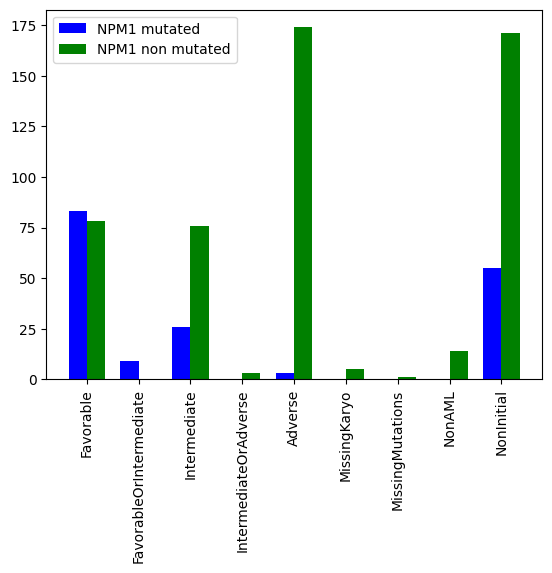

[83, 9, 26, 0, 3, 0, 0, 0, 55]
[78, 0, 76, 3, 174, 5, 1, 14, 171]


In [33]:
pronostic_cat = ['Favorable', 'FavorableOrIntermediate', 'Intermediate','IntermediateOrAdverse', 'Adverse', 'MissingKaryo', 'MissingMutations','NonAML', 'NonInitial']

prono_NPM1mut = get_number_for_bar(pronostic_cat, ind_NPM1mut, "ELN2017")
prono_nonNPM1mut = get_number_for_bar(pronostic_cat, ind_nonNPM1mut, "ELN2017")
plot_graph(pronostic_cat, prono_NPM1mut, prono_nonNPM1mut)

print(prono_NPM1mut)
print(prono_nonNPM1mut)

In [34]:
table = np.array([[83, 9, 26, 0, 3, 0, 0, 0, 55],
                  [78, 0, 76, 3, 174, 5, 1, 14, 171]])

table = 100*table/np.sum(table)
print(table)

chi2, p, dof, expected = stats.chi2_contingency(table)

residus = (table - expected) / np.sqrt(expected)

print(p)
print(residus)

[[11.89111748  1.28939828  3.72492837  0.          0.42979943  0.
   0.          0.          7.87965616]
 [11.1747851   0.         10.88825215  0.42979943 24.92836676  0.71633238
   0.14326648  2.00573066 24.49856734]]
0.0074916317095717585
[[ 2.51905512  1.69114171  0.02095773 -0.3292013  -2.3586708  -0.42499705
  -0.19006446 -0.71115608 -0.09956283]
 [-1.46271176 -0.98197647 -0.01216929  0.19115366  1.36958317  0.24677832
   0.11036262  0.4129391   0.05781205]]


# DiseaseStageAtSpecimenCollection

In [35]:
np.unique(list(data_beat_aml["diseaseStageAtSpecimenCollection"]))

array(['Initial Diagnosis', 'Relapse', 'Remission', 'Residual', 'Unknown',
       'nan'], dtype='<U32')

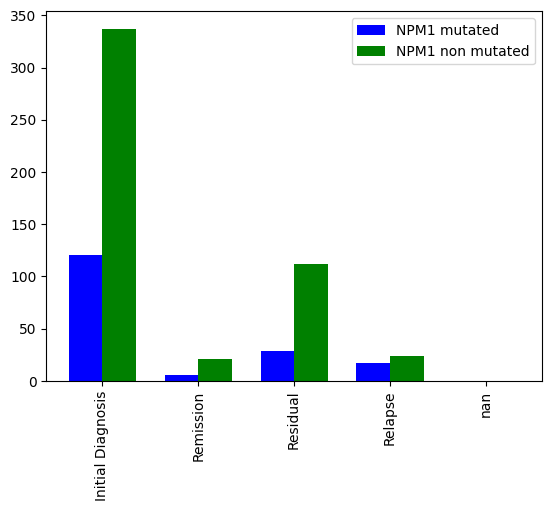

In [36]:
dstage_cat = ['Initial Diagnosis', 'Remission', 'Residual', 'Relapse', 'nan']

dstage_NPM1mut = get_number_for_bar(dstage_cat, ind_NPM1mut, "diseaseStageAtSpecimenCollection")
dstage_nonNPM1mut = get_number_for_bar(dstage_cat, ind_nonNPM1mut, "diseaseStageAtSpecimenCollection")
plot_graph(dstage_cat, dstage_NPM1mut, dstage_nonNPM1mut)

# FAB_BlastMorphology

In [37]:
np.unique(list(data_beat_aml["fabBlastMorphology"]))

array(['M0', 'M0 ', 'M0/M1', 'M1', 'M2', 'M3', 'M4', 'M4eo', 'M5', 'M5a',
       'M5b', 'M6', 'M6a', 'M6b', 'M7', 'NOS', 'nan'], dtype='<U32')

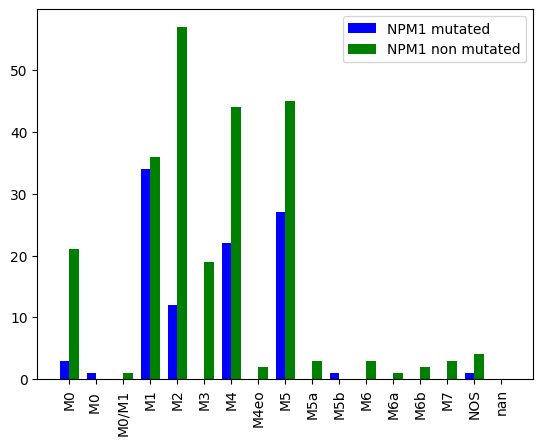

In [38]:
fab_cat = ['M0', 'M0 ', 'M0/M1', 'M1', 'M2', 'M3', 'M4', 'M4eo', 'M5', 'M5a',
       'M5b', 'M6', 'M6a', 'M6b', 'M7', 'NOS', 'nan']

fab_NPM1mut = get_number_for_bar(fab_cat, ind_NPM1mut, "fabBlastMorphology")
fab_nonNPM1mut = get_number_for_bar(fab_cat, ind_nonNPM1mut, "fabBlastMorphology")
plot_graph(fab_cat, fab_NPM1mut, fab_nonNPM1mut)

# FLT3-ITD

In [39]:
np.unique(list(data_beat_aml["FLT3-ITD"]))

array(['nan', 'negative', 'positive'], dtype='<U32')

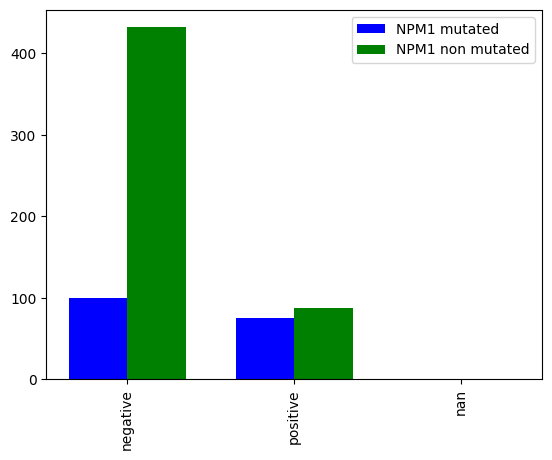

[100, 75, 0]
[432, 88, 0]


In [40]:
flt3_itd_cat = ['negative', 'positive', 'nan']

flt3_itd_NPM1mut = get_number_for_bar(flt3_itd_cat, ind_NPM1mut, "FLT3-ITD")
flt3_itd_nonNPM1mut = get_number_for_bar(flt3_itd_cat, ind_nonNPM1mut, "FLT3-ITD")
plot_graph(flt3_itd_cat, flt3_itd_NPM1mut, flt3_itd_nonNPM1mut)

print(flt3_itd_NPM1mut)
print(flt3_itd_nonNPM1mut)

In [41]:
table = np.array([[100, 75],
                  [432, 88]])

table = 100*table/np.sum(table)
print(table)

chi2, p, dof, expected = stats.chi2_contingency(table)

residus = (table - expected) / np.sqrt(expected)

print(p)
print(residus)

[[14.38848921 10.79136691]
 [62.15827338 12.6618705 ]]
0.01708748330105267
[[-1.1128903   2.01054766]
 [ 0.6456092  -1.1663576 ]]


# Gender

In [42]:
np.unique(list(data_beat_aml["consensus_sex"]))

array(['Female', 'Male', 'nan'], dtype='<U32')

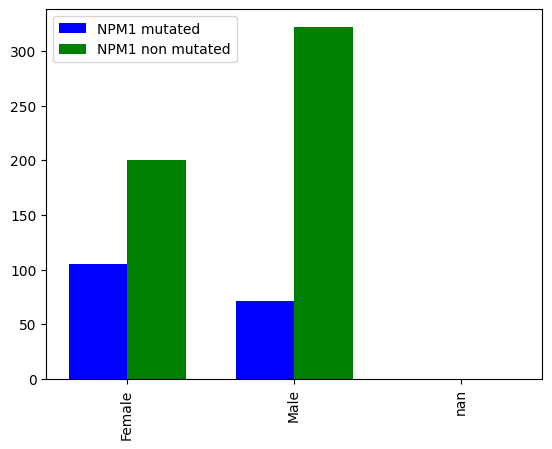

[105, 71, 0]
[200, 322, 0]


In [43]:
gender_cat = ['Female', 'Male', 'nan']

gender_NPM1mut = get_number_for_bar(gender_cat, ind_NPM1mut, "consensus_sex")
gender_nonNPM1mut = get_number_for_bar(gender_cat, ind_nonNPM1mut, "consensus_sex")
plot_graph(gender_cat, gender_NPM1mut, gender_nonNPM1mut)

print(gender_NPM1mut)
print(gender_nonNPM1mut)

In [44]:
table = np.array([[105, 115, 5], 
                  [200, 220, 2]])

table = 100*table/np.sum(table)
print(table)

chi2, p, dof, expected = stats.chi2_contingency(table)

residus = (table - expected) / np.sqrt(expected)

print(p)
print(residus)

[[16.22874807 17.77434312  0.77279753]
 [30.91190108 34.00309119  0.30911901]]
0.7232836720601123
[[-0.04071024 -0.05460769  0.64649256]
 [ 0.02972615  0.03987391 -0.47206148]]


# isDenovo & isTherapy

In [45]:
print(np.unique(list(data_beat_aml["isDenovo"])))
print(np.unique(list(data_beat_aml["isTransformed"])))

['FALSE' 'TRUE' 'unknown']
['FALSE' 'TRUE' 'unknown']


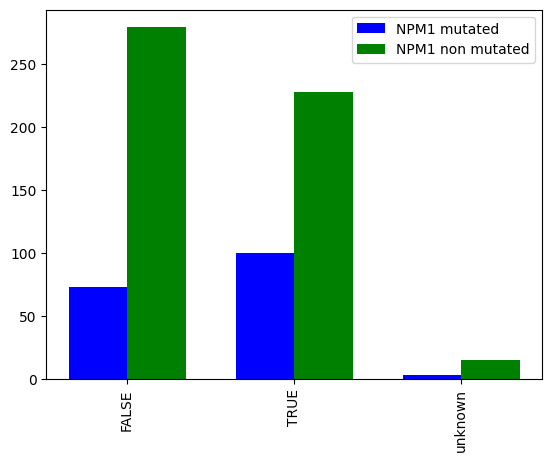

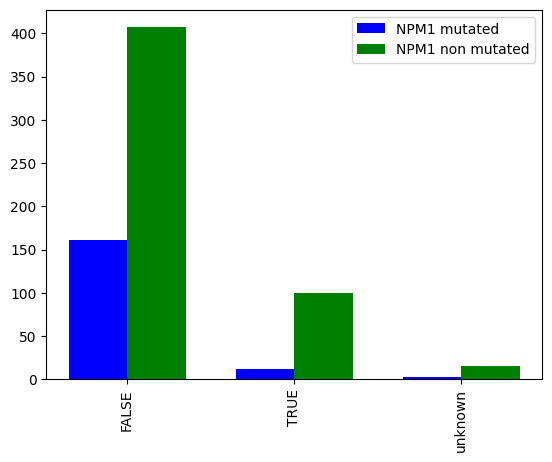

In [46]:
isDenovo_cat = ['FALSE', 'TRUE', 'unknown']
isTherapy_cat = ['FALSE', 'TRUE', 'unknown']

isDenovo_NPM1mut = get_number_for_bar(isDenovo_cat, ind_NPM1mut, "isDenovo")
isDenovo_nonNPM1mut = get_number_for_bar(isDenovo_cat, ind_nonNPM1mut, "isDenovo")
plot_graph(isDenovo_cat, isDenovo_NPM1mut, isDenovo_nonNPM1mut)

isTherapy_NPM1mut = get_number_for_bar(isTherapy_cat, ind_NPM1mut, "isTransformed")
isTherapy_nonNPM1mut = get_number_for_bar(isTherapy_cat, ind_nonNPM1mut, "isTransformed")
plot_graph(isTherapy_cat, isTherapy_NPM1mut, isTherapy_nonNPM1mut)

# ReportedEthnicity & ReportedRace

In [47]:
print(np.unique(list(data_beat_aml["reportedEthnicity"])))
print(np.unique(list(data_beat_aml["reportedRace"])))

['DECLINED' 'HISPANIC' 'NON-HISPANIC' 'UNKNOWN' 'nan']
['American Indian' 'Asian' 'Black' 'Declined' 'Multiracial'
 'Pacific Islander' 'Unknown' 'White' 'nan']


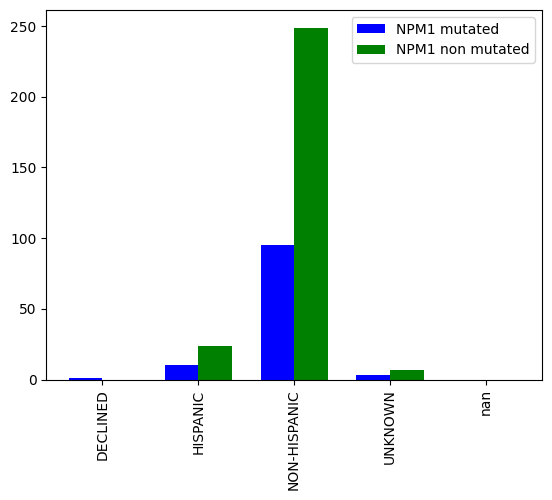

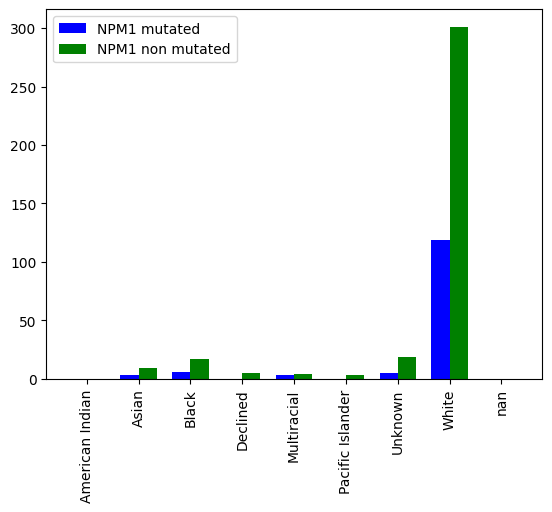

In [48]:
Ethni_cat = ['DECLINED', 'HISPANIC', 'NON-HISPANIC', 'UNKNOWN', 'nan']
Race_cat = ['American Indian', 'Asian', 'Black', 'Declined', 'Multiracial', 'Pacific Islander', 'Unknown', 'White', 'nan']

Ethni_NPM1mut = get_number_for_bar(Ethni_cat, ind_NPM1mut, "reportedEthnicity")
Ethni_nonNPM1mut = get_number_for_bar(Ethni_cat, ind_nonNPM1mut, "reportedEthnicity")
plot_graph(Ethni_cat, Ethni_NPM1mut, Ethni_nonNPM1mut)

Race_NPM1mut = get_number_for_bar(Race_cat, ind_NPM1mut, "reportedRace")
Race_nonNPM1mut = get_number_for_bar(Race_cat, ind_nonNPM1mut, "reportedRace")
plot_graph(Race_cat, Race_NPM1mut, Race_nonNPM1mut)

Il ne semble pas avoir de différence significative (à l'oeil) de la mutation NPM1 entre les différentes ethnies.

# SpecimenType

In [49]:
np.unique(list(data_beat_aml["specimenType"]))

array(['Bone Marrow Aspirate', 'Leukapheresis', 'Peripheral Blood'],
      dtype='<U20')

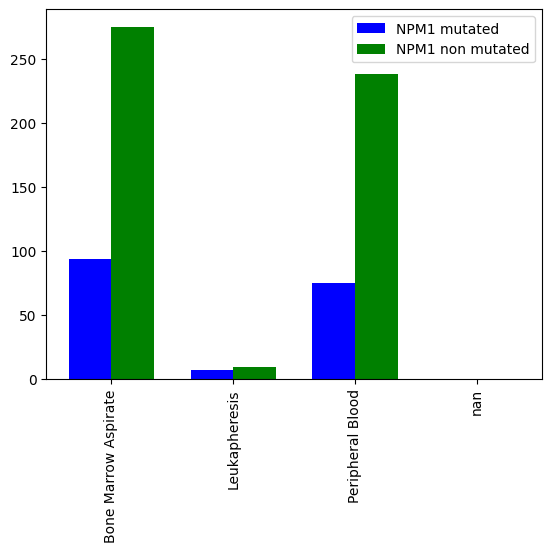

In [50]:
prelevement_cat = ['Bone Marrow Aspirate', 'Leukapheresis', 'Peripheral Blood', 'nan']

prelevement_NPM1mut = get_number_for_bar(prelevement_cat, ind_NPM1mut, "specimenType")
prelevement_nonNPM1mut = get_number_for_bar(prelevement_cat, ind_nonNPM1mut, "specimenType")
plot_graph(prelevement_cat, prelevement_NPM1mut, prelevement_nonNPM1mut)

# NPM1

In [51]:
np.unique(list(data_beat_aml["NPM1"]))

array(['nan', 'negative', 'positive'], dtype='<U32')

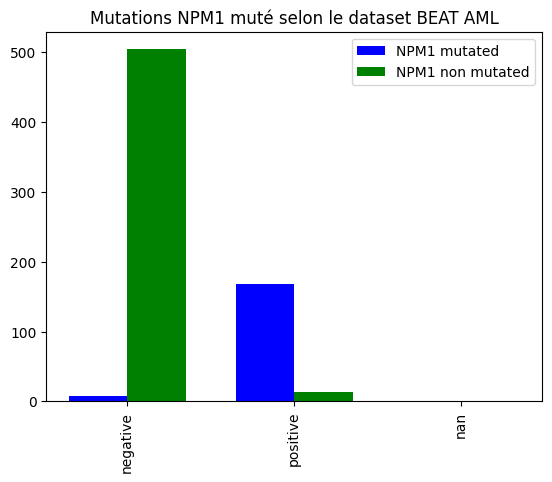

[8, 168, 0]
[504, 14, 0]


In [52]:
npm1_cat = ['negative', 'positive', 'nan'] #neg = ?, pos = ?

npm1_NPM1mut = get_number_for_bar(npm1_cat, ind_NPM1mut, "NPM1")
npm1_nonNPM1mut = get_number_for_bar(npm1_cat, ind_nonNPM1mut, "NPM1")
plt.title("Mutations NPM1 muté selon le dataset BEAT AML")
plot_graph(npm1_cat, npm1_NPM1mut, npm1_nonNPM1mut)

print(npm1_NPM1mut) #bleu
print(npm1_nonNPM1mut) #vert

In [53]:
table = np.array([[8, 168], 
                 [504, 14]])

table = 100*table/np.sum(table)
print(table)

chi2, p, dof, expected = stats.chi2_contingency(table)

residus = (table - expected) / np.sqrt(expected)

print(p)
print(residus)

[[ 1.15273775 24.2074928 ]
 [72.62247839  2.01729107]]
4.96571585472086e-19
[[-4.05895456  6.80790483]
 [ 2.36595044 -3.96830396]]


# vitalStatus

In [54]:
np.unique(list(data_beat_aml["vitalStatus"]))

array(['Alive', 'Dead', 'Unknown'], dtype='<U7')

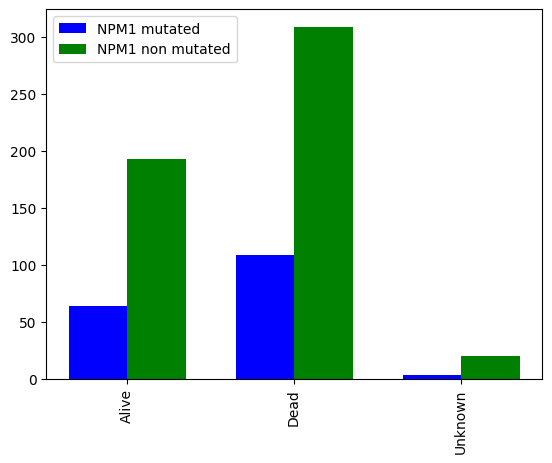

In [55]:
stat_cat = ['Alive', 'Dead', 'Unknown']

stat_NPM1mut = get_number_for_bar(stat_cat, ind_NPM1mut, "vitalStatus")
stat_nonNPM1mut = get_number_for_bar(stat_cat, ind_nonNPM1mut, "vitalStatus")
plot_graph(stat_cat, stat_NPM1mut, stat_nonNPM1mut)

In [56]:
usable_cat = ["consensus_sex", "reportedRace", "reportedEthnicity", "CEBPA_Biallelic", "consensusAMLFusions", "isRelapse", "isDenovo", "isTransformed", "specificDxAtAcquisition_MDSMPN", "nonAML_MDSMPN_specificDxAtAcquisition", "cumulativeChemo", "priorMalignancyRadiationTx", "priorMDS", "priorMDSMoreThanTwoMths", "priorMDSMPN", "priorMDSMPNMoreThanTwoMths", "priorMPN", "priorMPNMoreThanTwoMths", "ELN2017", "diseaseStageAtSpecimenCollection", "specimenType", "totalDrug", "cumulativeTreatmentRegimenCount", "cumulativeTreatmentStageCount", "responseToInductionTx", "typeInductionTx", "mostRecentTreatmentType", "vitalStatus", "causeOfDeath", "FLT3-ITD", "NPM1", "RUNX1", "ASXL1", "TP53"]


for cat in usable_cat:
    print(f"{cat} :")
    print(np.unique(list(data_beat_aml[cat])))
    print("\n")

consensus_sex :
['Female' 'Male' 'nan']


reportedRace :
['American Indian' 'Asian' 'Black' 'Declined' 'Multiracial'
 'Pacific Islander' 'Unknown' 'White' 'nan']


reportedEthnicity :
['DECLINED' 'HISPANIC' 'NON-HISPANIC' 'UNKNOWN' 'nan']


CEBPA_Biallelic :
['bi' 'mono' 'nan']


consensusAMLFusions :
['BCR-ABL1' 'CBFB-MYH11' 'DEK-NUP214' 'GATA2-MECOM' 'KMT2A_re'
 'MLLT3-KMT2A' 'PML-RARA' 'RUNX1-RUNX1T1' 'nan']


isRelapse :
['FALSE' 'TRUE' 'unknown']


isDenovo :
['FALSE' 'TRUE' 'unknown']


isTransformed :
['FALSE' 'TRUE' 'unknown']


specificDxAtAcquisition_MDSMPN :
[False  True]


nonAML_MDSMPN_specificDxAtAcquisition :
[False  True]


cumulativeChemo :
['n' 'y']


priorMalignancyRadiationTx :
['n' 'y']


priorMDS :
['n' 'y']


priorMDSMoreThanTwoMths :
['n' 'y']


priorMDSMPN :
['n' 'y']


priorMDSMPNMoreThanTwoMths :
['n' 'u' 'y']


priorMPN :
['n' 'y']


priorMPNMoreThanTwoMths :
['n' 'y']


ELN2017 :
['Adverse' 'Favorable' 'FavorableOrIntermediate' 'Intermediate'
 'Intermediate

In [57]:
np.unique(list(data_beat_aml["TP53"]))

array(['TP53', 'TP53 (C238R; MAF 5% (not confirmed by Sanger seq))',
       'TP53 (loss exons 10-11)', 'TP53 (p.D281G; 43.9%)',
       'TP53 (p.E204*; 52.3%)', 'TP53 (p.E343*; 56.0%)',
       'TP53 (p.G245S; 83.1%)', 'TP53 (p.G245S; 89.1%)',
       'TP53 (p.G266E; 82.1%)',
       'TP53 (p.G266R; 41.8%)|TP53 (p.Y220C; 46.5%)',
       'TP53 (p.G266V; 65.7%)', 'TP53 (p.G266V; 91.4%)',
       'TP53 (p.H179N; 16.9%)|TP53 (p.I195Mfs*13; 9.9%)|TP53 (p.I195Yfs*14; 11.4%)',
       'TP53 (p.H193R; 90.7%)', 'TP53 (p.H193Y; 42.5%)',
       'TP53 (p.I195T; 22.2%)|TP53 (p.P151R; 54.8%)',
       'TP53 (p.I251M; 29.0%)|TP53 (p.R249M; 18.6%)',
       'TP53 (p.K132R; 39.4%)|TP53 (p.X126_splice; 51.3%)',
       'TP53 (p.L130Pfs*19; 33.3%)', 'TP53 (p.L194R; 86.6%)',
       'TP53 (p.L194R; 88.3%)', 'TP53 (p.L257Q; 84.5%)',
       'TP53 (p.M340Cfs*5; 41.0%)|TP53 (p.R273H; 47.8%)',
       'TP53 (p.M340Cfs*5; 50.0%)|TP53 (p.R273H; 42.2%)',
       'TP53 (p.N239*; 57.9%)', 'TP53 (p.P151H; 97.9%)',
       'TP53 

In [62]:
# if pd.isna(cat) or cat == 'nan':


def get_number_for_bar_spe(cat_name:list[str], ind_list:list[str], feature:str)->list[int]:
    number_for_bar = [0, 0]
    
    for ind in ind_list:
        index_ind = ind_beataml.index(ind)
        OneCat = data_beat_aml.iloc[index_ind][feature]

        if pd.isna(OneCat) or OneCat == 'nan':
            number_for_bar[1] += 1
        else:
            number_for_bar[0] += 1

    return number_for_bar

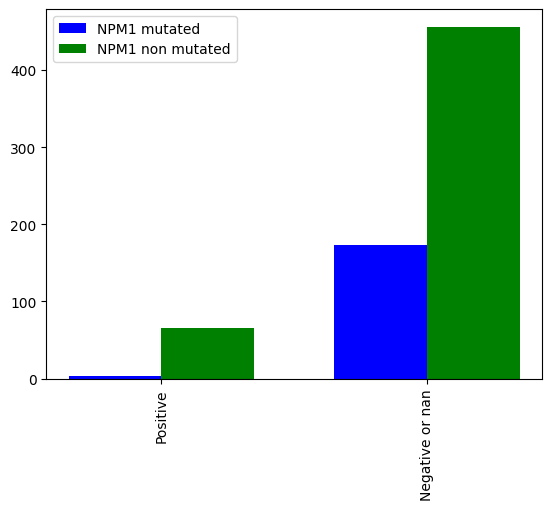

In [75]:
stat_cat = ["Positive", "Negative or nan"]

stat_NPM1mut = get_number_for_bar_spe(stat_cat, ind_NPM1mut, "ASXL1")
stat_nonNPM1mut = get_number_for_bar_spe(stat_cat, ind_nonNPM1mut, "ASXL1")
plot_graph(stat_cat, stat_NPM1mut, stat_nonNPM1mut)

In [73]:
table = np.array([stat_NPM1mut, 
                 stat_nonNPM1mut])

table = 100*table/np.sum(table)
print(table)

chi2, p, dof, expected = stats.chi2_contingency(table)

residus = (table - expected) / np.sqrt(expected)

print(p)
print(residus)

[[ 0.14326648 25.07163324]
 [ 8.88252149 65.9025788 ]]
0.18951816035134866
[[-1.41362272  0.44526333]
 [ 0.8208326  -0.25854611]]
